In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [2]:

def count_images_in_directory(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts 

train= r"F:\playing\tomato\train"
test = r"F:\playing\tomato\val"   
train_counts = count_images_in_directory(train)
test_counts = count_images_in_directory(test)
print("Training set class counts:", train_counts)
print("Testing set class counts:", test_counts)

Training set class counts: {'Tomato___Bacterial_spot': 1000, 'Tomato___Early_blight': 1000, 'Tomato___healthy': 1000, 'Tomato___Late_blight': 1000, 'Tomato___Leaf_Mold': 1000, 'Tomato___Septoria_leaf_spot': 1000, 'Tomato___Spider_mites Two-spotted_spider_mite': 1000, 'Tomato___Target_Spot': 1000, 'Tomato___Tomato_mosaic_virus': 1000, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1000}
Testing set class counts: {'Tomato___Bacterial_spot': 100, 'Tomato___Early_blight': 100, 'Tomato___healthy': 100, 'Tomato___Late_blight': 100, 'Tomato___Leaf_Mold': 100, 'Tomato___Septoria_leaf_spot': 100, 'Tomato___Spider_mites Two-spotted_spider_mite': 100, 'Tomato___Target_Spot': 100, 'Tomato___Tomato_mosaic_virus': 100, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100}


In [7]:
# using matplotlib to display pie chart of the training set
import matplotlib.pyplot as plt
def display_count_values(value):
    # Count the number of images in each class
    labels = list(value.keys())
    counts = list(value.values())
    # Create a pie chart
    plt.figure(figsize=(3,3))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Classes in Training Set')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.show()


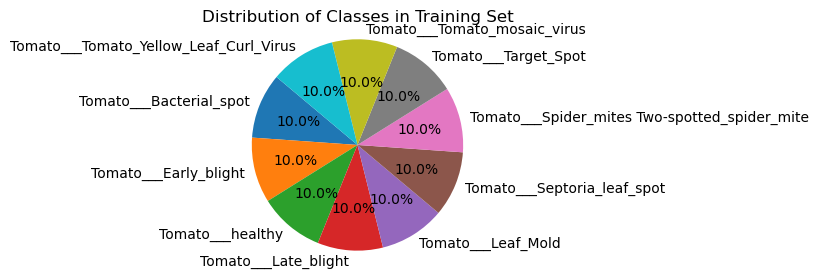

In [10]:
display_count_values(train_counts)

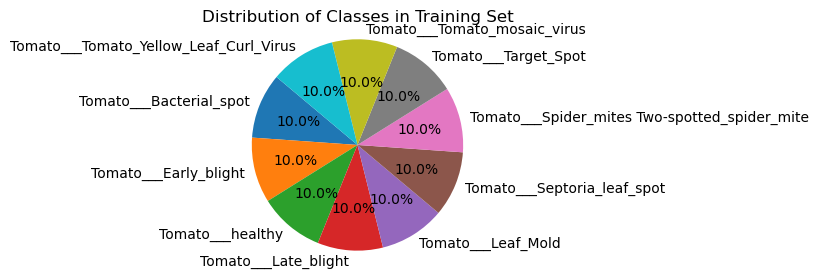

In [ ]:
# Count the number of images in each class
display_count_values(test_counts)

In [ ]:
train_generator=ImageDataGenerator(rescale=1.0/255,preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory= r"F:\playing\tomato\train",target_size=(224,224),batch_size=15,class_mode='categorical')
test_generator=ImageDataGenerator(rescale=1.0/255,preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=r"F:\playing\tomato\val" ,target_size=(224,224),batch_size=15,class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:

# Display some images from the training set..
def display(path):
    plt.figure(figsize=[10,10])
    for i in range(0, 9):
        plt.subplot(3, 3, i+1)
        for X_batch, Y_batch in path:
            image = X_batch[0]
            label = Y_batch[0]
            for a, b in zip(label, labels):
                if a==1:
            
                    plt.title(b)
            
            plt.axis('off')
            plt.imshow(image)
            break

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-121.68..76.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-112.68..100.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..143.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..138.22101].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-117.68..82.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..102.221].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to

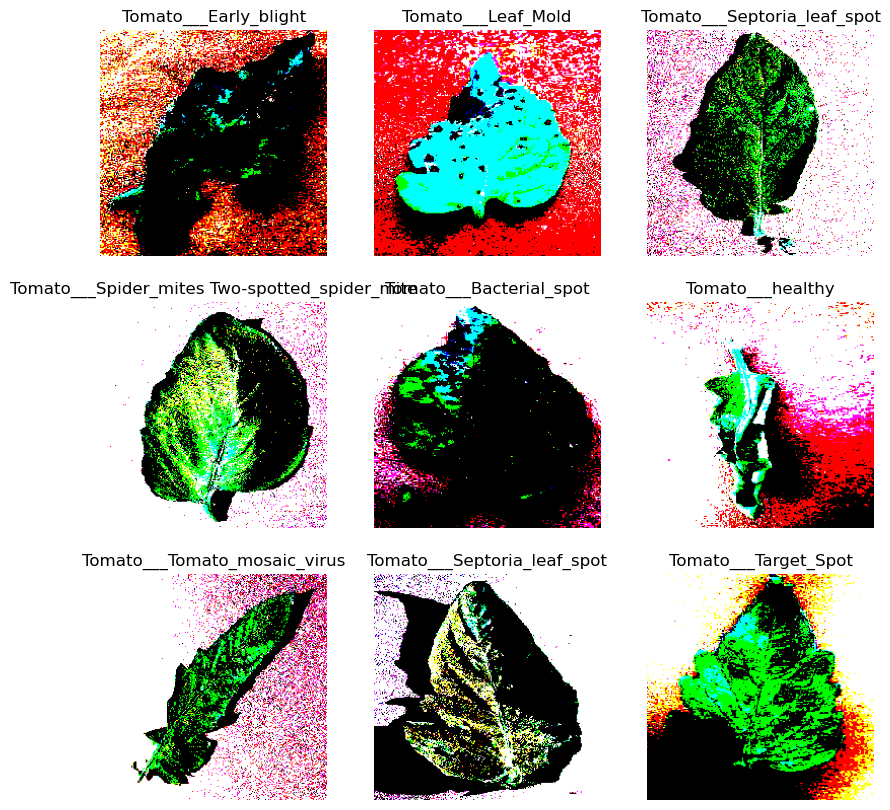

In [16]:
display(train_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..145.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..113.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-117.68..88.061].
Clipping input data t

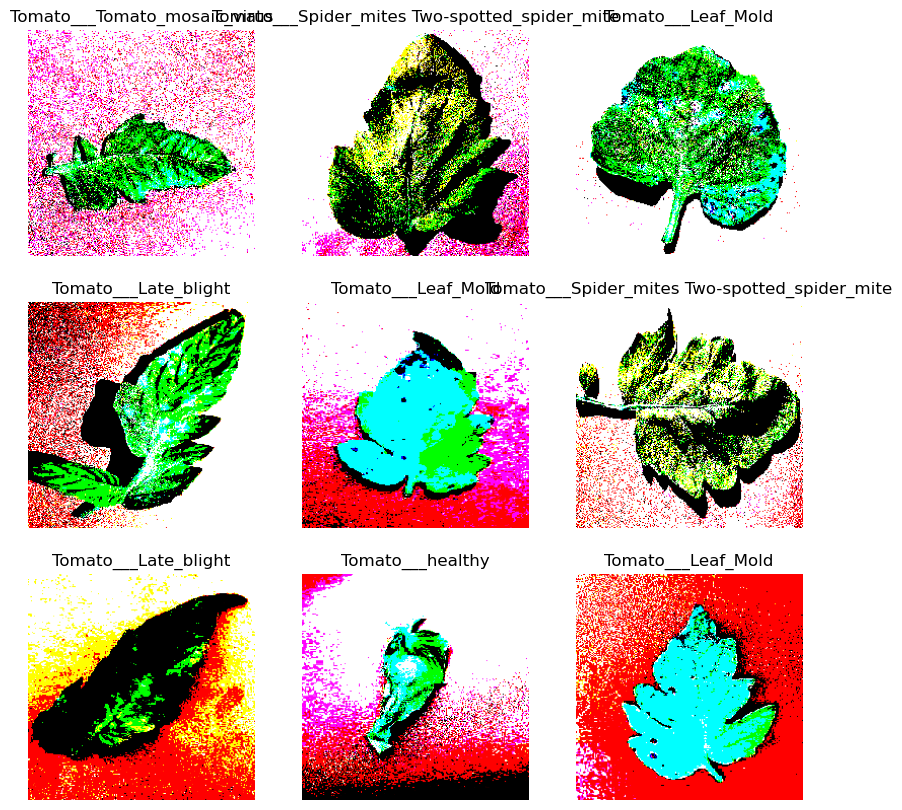

In [17]:
display(test_generator)

In [4]:
# visualize training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [29]:
#early stopping and model check point
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')

#model check point
mc=ModelCheckpoint(monitor="val_accuracy",filepath='./bestmodelmo.h5',verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

In [6]:
label=len(train_counts)
label

10

In [16]:
#cnn model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="leaky_relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=label,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      1168      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 108, 108, 32)     1

In [17]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
cnn_history=model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1,
    callbacks=cd
)

Epoch 1/10
667/667 [==============================] - ETA: 0s - loss: 1.7263 - accuracy: 0.4340
Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to .\bestmodel.h5
667/667 [==============================] - 406s 604ms/step - loss: 1.7263 - accuracy: 0.4340 - val_loss: 1.4429 - val_accuracy: 0.5250
Epoch 2/10
667/667 [==============================] - ETA: 0s - loss: 1.2296 - accuracy: 0.5853
Epoch 2: val_accuracy improved from 0.52500 to 0.73100, saving model to .\bestmodel.h5
667/667 [==============================] - 308s 461ms/step - loss: 1.2296 - accuracy: 0.5853 - val_loss: 0.8590 - val_accuracy: 0.7310
Epoch 3/10
667/667 [==============================] - ETA: 0s - loss: 1.0030 - accuracy: 0.6597
Epoch 3: val_accuracy improved from 0.73100 to 0.76600, saving model to .\bestmodel.h5
667/667 [==============================] - 307s 459ms/step - loss: 1.0030 - accuracy: 0.6597 - val_loss: 0.7834 - val_accuracy: 0.7660
Epoch 4/10
667/667 [=============================

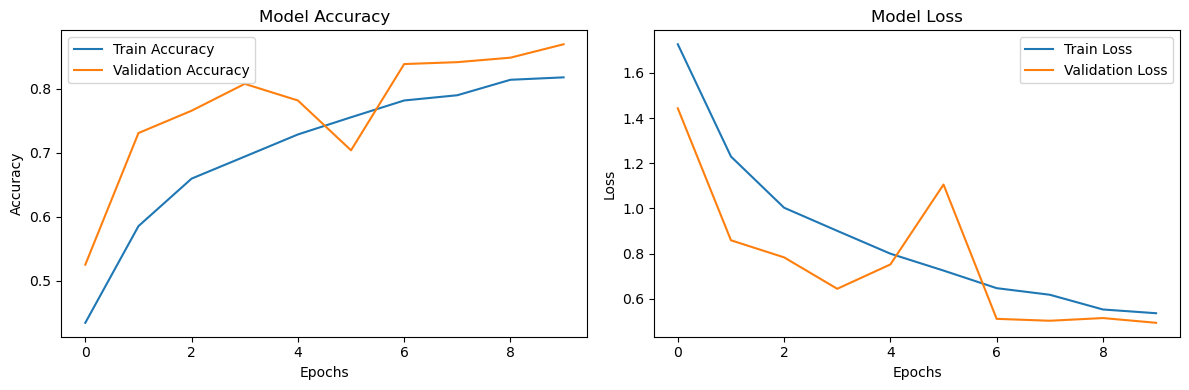

67/67 [==============================] - 13s 189ms/step - loss: 0.4939 - accuracy: 0.8700
Test Loss: 0.49392712116241455, Test Accuracy: 0.8700000047683716


In [19]:
# Plot the training history
plot_training_history(cnn_history)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")# 

In [20]:
prediction=model.predict(test_generator)

67/67 [==============================] - 10s 137ms/step


In [36]:
train_generator1=ImageDataGenerator(rescale=1.0/255,preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory= r"F:\playing\tomato\train",target_size=(224,224),batch_size=100,class_mode='categorical')
test_generator1=ImageDataGenerator(rescale=1.0/255,preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=r"F:\playing\tomato\val" ,target_size=(224,224),batch_size=100,class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [37]:
import keras
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from keras.models import Model
base_model=MobileNetV2(weights="imagenet")
# # Freeze the base model
# base_model.layers[-1].output
# base_model.trainable = False
# Add custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(label, activation='softmax')  # Binary classification
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 16)                16016     
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                      

In [38]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
mobil_history=model.fit(
    train_generator1,
    validation_data=test_generator1,
    batch_size=100,
    epochs=10,
    verbose=1,
    callbacks=cd
)

Epoch 1/10


In [ ]:
# Plot the training history
plot_training_history(mobil_history)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")# 